### DBSCAN (density-based spatial clustering of applications with noise)
* 군집 알고리즘.
* 클러스터의 개수를 미리 지정할 필요가 없다.
* 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.
* 병합 군집이나 k-평균포다는 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.
* 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다. - 밀집 지역(dense region)
* 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것.
* 핵심 샘플 (핵심 포인트) - 밀집 지역에 있는 포인트
* 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류.
* eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐.
    * 시작할 때 무작위로 포인트를 선택.
    * 그 포인트에서 eps 거라 안의 모든 포인트를 찾는다.
    * 만약 eps 거리 안에 있는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블.
    * eps 거리 안에 min_samples보다 많은 포인트가 있다면 그 포인트는 그 포인트는 핵심 샘플로 레이블, 새로운 클러스터 레이블 할당.
    * 그 포인트의 (eps 거리 안의) 모든 이웃을 살핀다.
    * 어떤 클러스터에도 아직 할당되지 않았다면 바로 전에 만든 클러스터 레이블을 할당.
    * 만약 핵심 샘플이면 그 포인트의 이웃을 차례로 방문.
    * 클러스터는 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 자라난다.
* 포인트의 종류
    * 핵심 포인트
    * 경계 포인트 (핵심 포인트에서 eps 거리 안에 있는 포인트)
    * 잡음 포인트
* DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심 포인트의 군집은 항상 같고 매번 같은 포인트를 잡음으로 레이블한다.
* 경계 포인트는 한 개 이상의 클러스터 핵심 샘플의 이웃일 수 있다.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('cluster label:\n{}'.format(clusters))

cluster label:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


* 모든 포인트에 잡음 포인트 의미하는 -1 레이블.
* 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples 기본값 때문.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


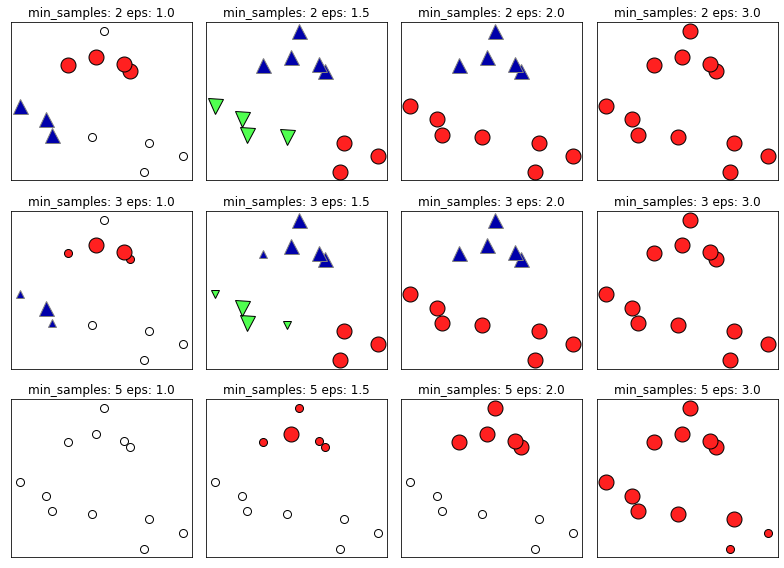

In [2]:
import mglearn

mglearn.plots.plot_dbscan()

* 클러스터에 삭한 포인트는 색을 칠하고, 잡음 포인트는 하얀색.
* 핵심 샘플은 크게 표시, 경계 포인트는 작게.
* eps
    * 가까운 포인트의 범위를 결정하기 때문에 더 중요.
* min_samples
    * 덜 조밀한 지역에 있는 포인트들이 잡음 포인트가 될 것인지
    * 하나의 클러스터가 될 것인지를 결정하는 데 중요한 역할
* 적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋다.

Text(0, 0.5, 'feature 1')

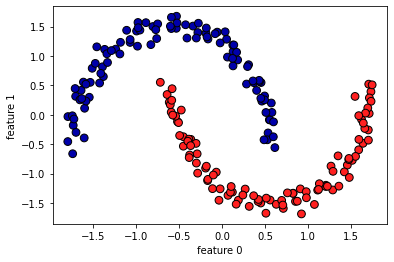

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### 군집 알고리즘의 비교와 평가
#### 타깃 값으로 군집 평가하기
* ARI(adjusted rand index)
* NMI(normalized mutual information)

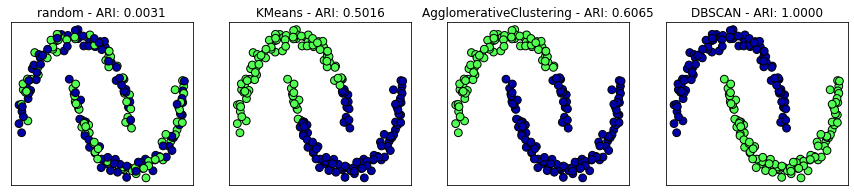

In [6]:
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('random - ARI: {:.4f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI: {:.4f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

* 군집 모델 평가할 때 흔히 하는 실수
    * adjusted_rand_score나 normalized_mutual_info_score 같은 군집용 측정 도구를 사용하지 않고 accuracy_score를 사용하는 것.

In [8]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print('acc: {:.3f}'.format(accuracy_score(clusters1, clusters2)))
print('ARI: {:.3f}'.format(adjusted_rand_score(clusters1, clusters2)))

acc: 0.000
ARI: 1.000


#### 타깃 값 없이 군집 평가하기
* 군집 알고리즘을 적용할 때 보통 그 결과와 비교할 타깃 값이 없다.
* 타깃 값이 필요 없는 군집용 지표로 실루엣 계수(silhouette coefficient)
* 클러스터의 밀집 정도를 계산하는 것
    * 높을수록 좋으며 최대 점수는 1.
    * -1일 때는 잘못된 군집
    * 0은 중첩된 클러스터

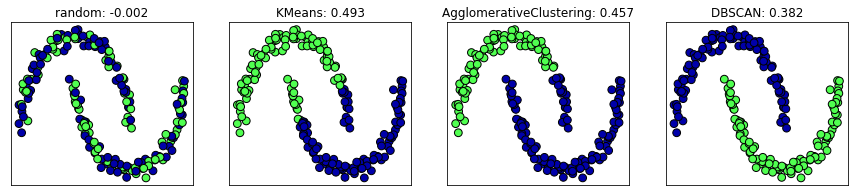

In [11]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('random: {:.3f}'.format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}: {:.3f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

#### 얼굴 데이터셋으로 군집 알고리즘 비교

In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [13]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('unique labels:', np.unique(labels))

unique labels: [-1]


In [14]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('unique labels:', np.unique(labels))

unique labels: [-1]


In [15]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('unique lables:', np.unique(labels))

unique lables: [-1  0]


In [16]:
print('cluster point numbers:', np.bincount(labels + 1))

cluster point numbers: [  32 2031]


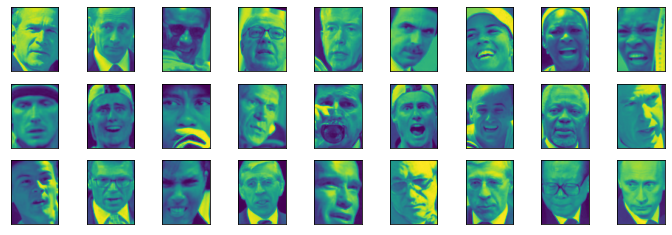

In [17]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

* 특이한 것을 찾아내는 이런 종류의 분석을 이상치 검출(outlier detection)

In [18]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print('\neps=', eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('cluster num:', len(np.unique(labels)))
    print('cluster size:', np.bincount(labels + 1))


eps= 1
cluster num: 1
cluster size: [2063]

eps= 3
cluster num: 1
cluster size: [2063]

eps= 5
cluster num: 1
cluster size: [2063]

eps= 7
cluster num: 14
cluster size: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
cluster num: 4
cluster size: [1307  750    3    3]

eps= 11
cluster num: 2
cluster size: [ 413 1650]

eps= 13
cluster num: 2
cluster size: [ 120 1943]


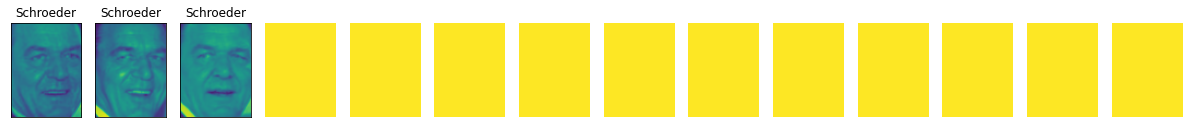

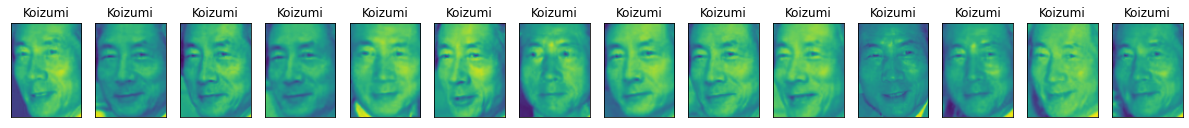

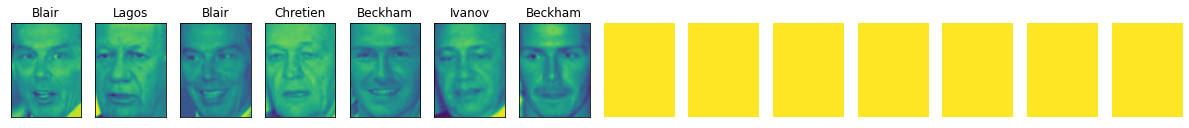

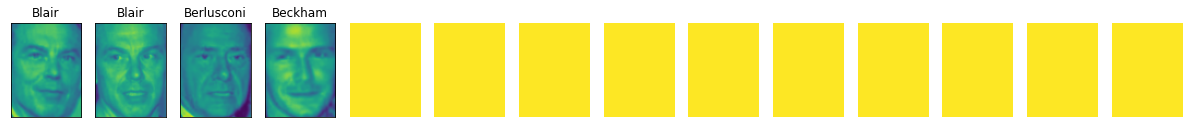

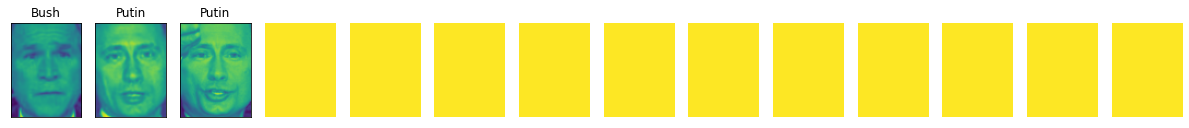

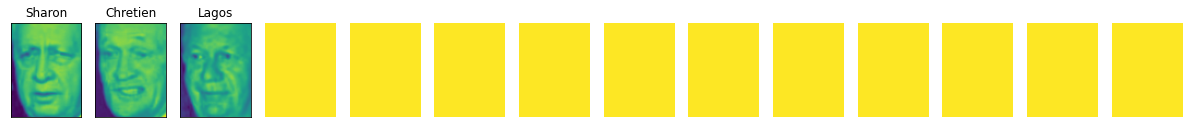

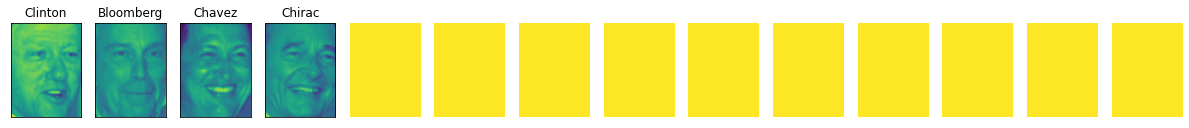

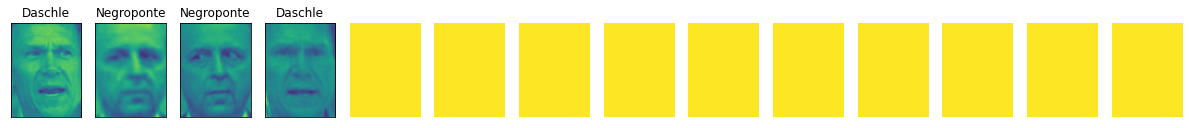

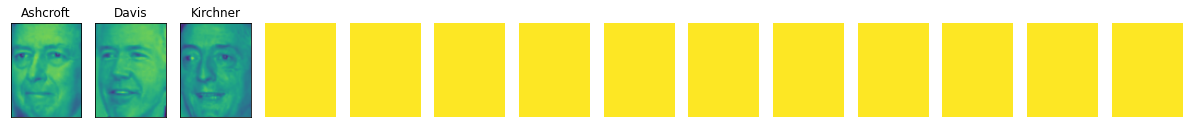

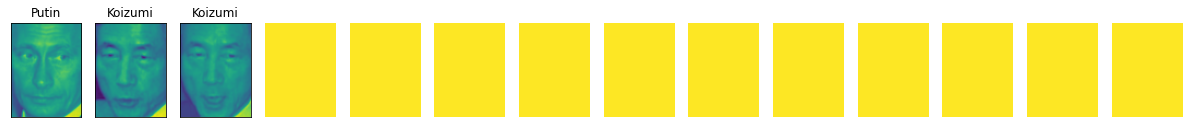

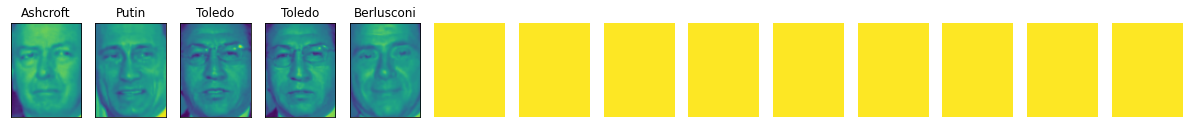

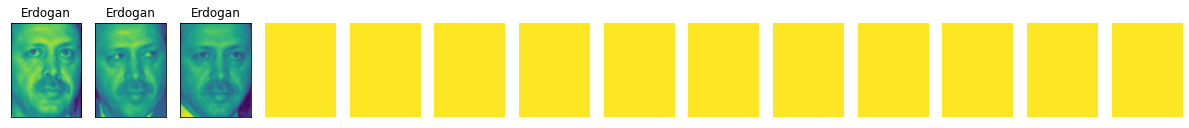

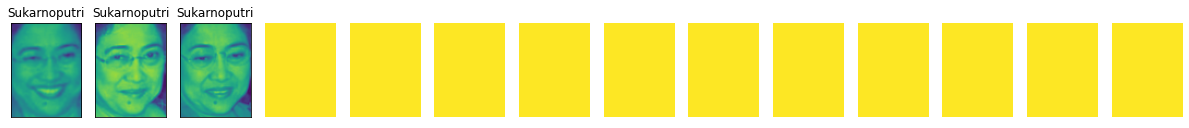

In [19]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14 * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j + i].imshow(np.array([[1] * 65] * 87), vmin=0, vmax=1)
        axes[j + i].axis('off')

#### k-평균으로 얼굴 데이터셋 분석하기

In [20]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('k-means cluster size:', np.bincount(labels_km))

k-means cluster size: [282 226 105 268 151 324 202 208 208  89]


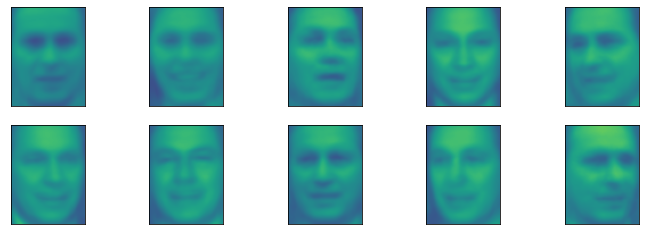

In [21]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

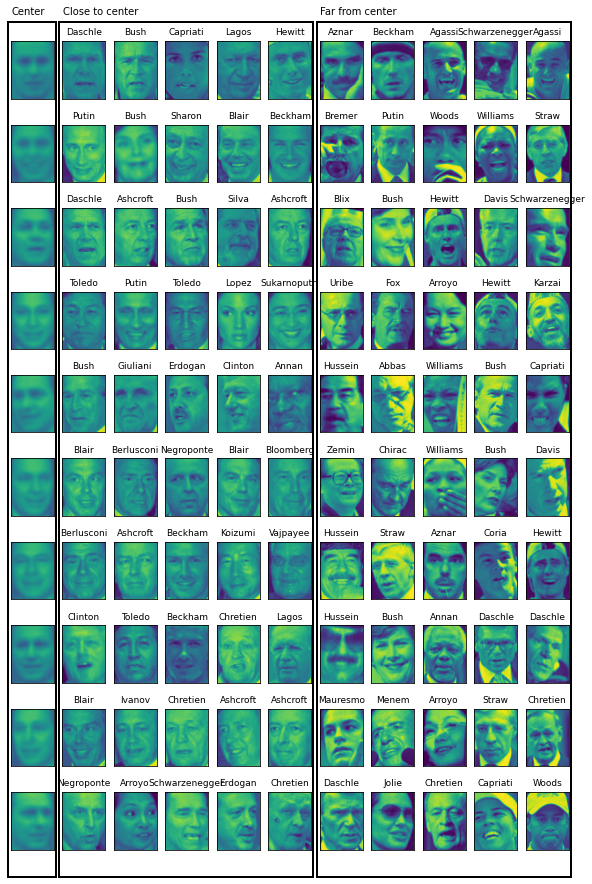

In [22]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

#### 병합 군집으로 얼굴 데이터셋 분석하기

In [23]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('clutser size:', np.bincount(labels_agg))

clutser size: [169 660 144 329 217  85  18 261  31 149]


In [24]:
print('ARI: {:.3f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.103


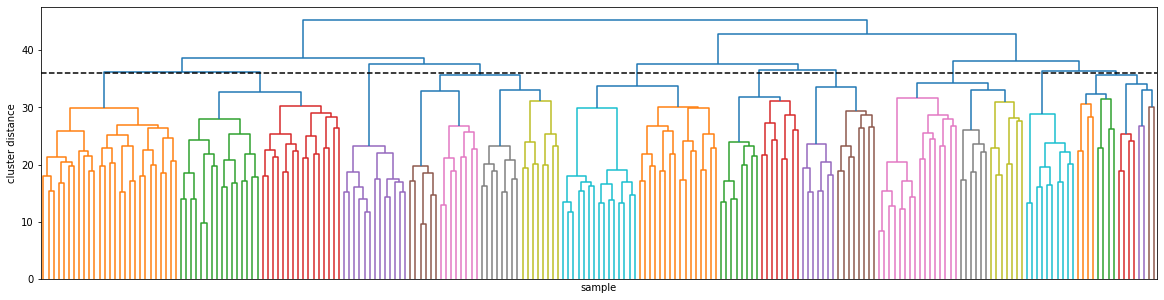

In [25]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('sample')
plt.ylabel('cluster distance')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

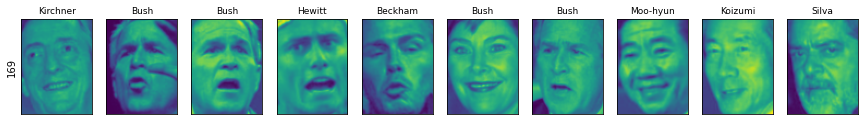

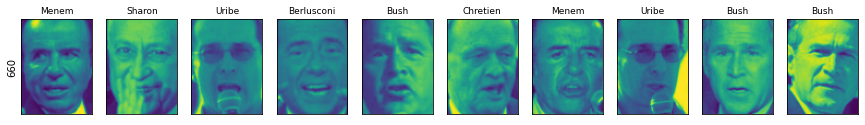

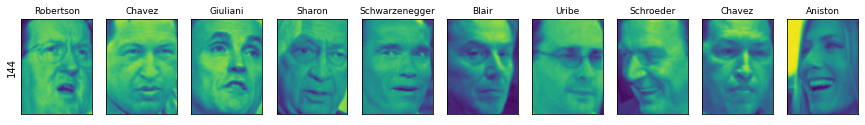

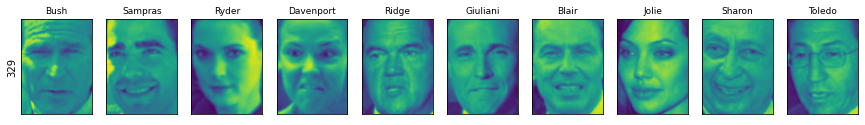

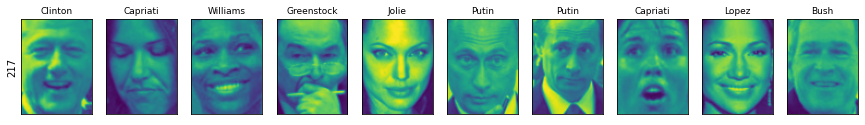

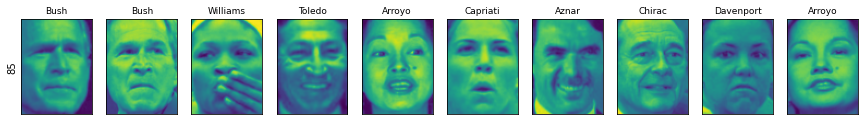

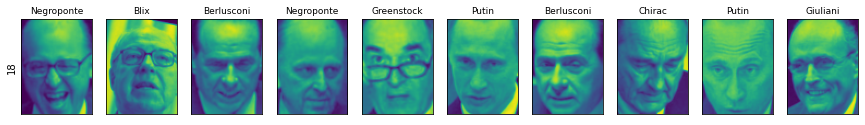

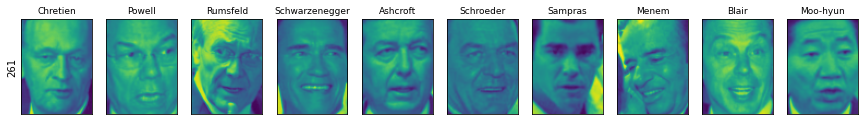

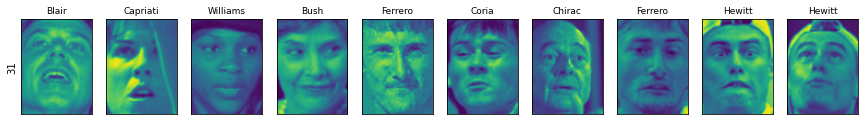

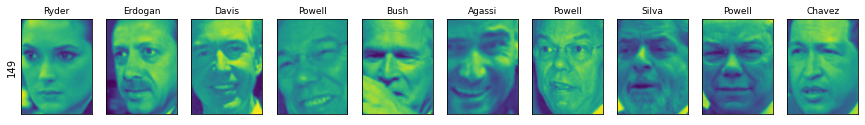

In [26]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

cluster size: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


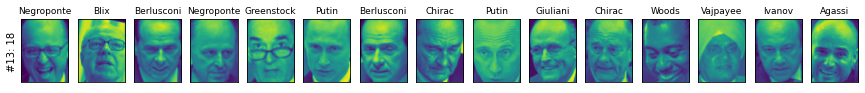

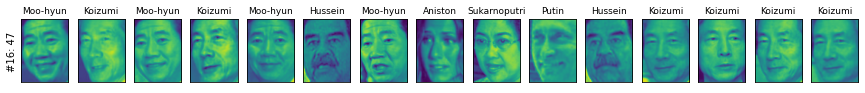

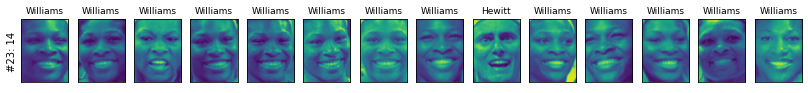

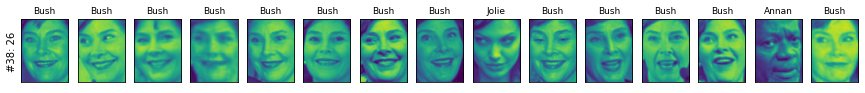

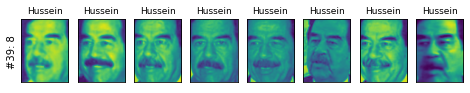

In [27]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('cluster size:', np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

### 군집 알고리즘 요약
* k-평균은 클러스터 중심을 사용해 클러스터를 구분.
    * 각 데이터 포인트를 클러스터의 중심으로 대표할 수 있기 때문에 분해 방법으로 볼 수도 있다.
* DBSCAN은 클러스터에 할당되지 않는 잡음 포인트를 인식할 수 있으며 클러스터의 개수를 자동으로 결정한다.
    * 크기가 많이 다른 클러스터를 만들어니곤 한다.
* 병합 군집은 전체 데이터의 분할 계층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인할 수 있다.